In [1]:
import caiman as cm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2023-01-23 14:42:43.112169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tif_file = '/ceph/imaging1/arie/illumination_test/20221212_illumination-color-test_Croc/20221212_429419_illumination_00001.tif'

In [3]:
screen_data = {
'screen_color': ['blue','blue','blue','blue','blue','blue_n',
          'green','green','green','green','green','green_n',
          'red','red','red','red','red','red_n'
          'white','white','white','white','white','white','white','white_n'],

'plot_color': ['blue','blue','blue','blue','blue','blue',
          'green','green','green','green','green','green',
          'red','red','red','red','red','red',
          'k','k','k','k','k','k','k'],

'intensity': [-.5,-1.,-1.8,-2.5,-3.5,-0.5,
              -3.5,-2.5,-1.8,-1.,-0.5,-0.5,
              -3.5,-2.5,-1.8,-1.,-0.5,-0.5,
              -10,-3.5,-2.5,-1.8,-1.,-0.5,-0.5],

'onset':[0,4650,7840,11346,15228,19256,
          23821,27830,31383,34983,38558,42433,
          46056,49333,53307,56341,60087,63788,
          67638,70874,75032,78078,81763,85325,88921],
'offset':[4172,7837,11343,14951,18636,22867,
           27602,31118,34760,38303,42198,45487,
           49148,53098,56338,59888,63508,67065,
           70630,74883,77911,81450,85094,88666,92390]
}

screen_data = pd.DataFrame(screen_data)


In [4]:
movie = cm.load(tif_file)

In [5]:
mean_activity = np.mean(movie,axis=(1,2))

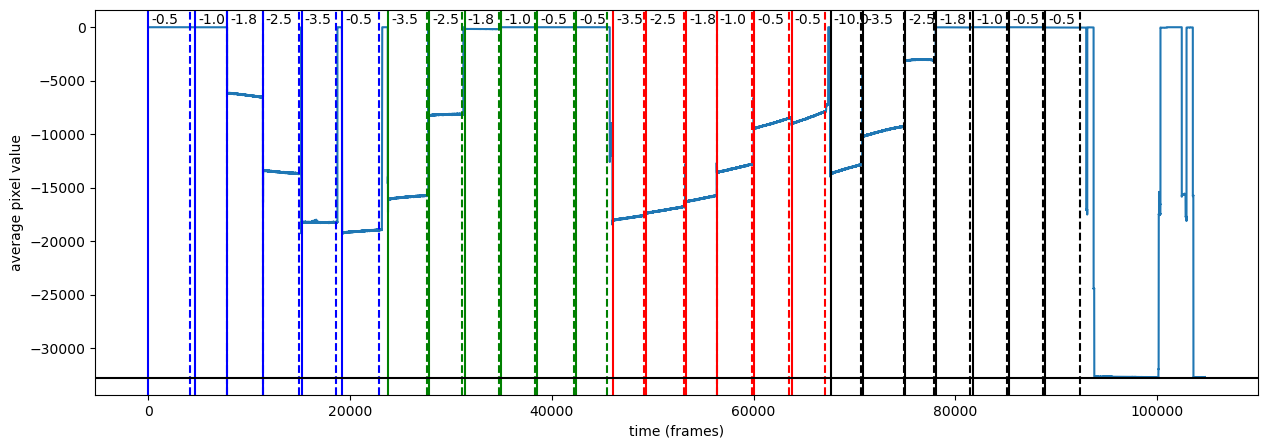

In [7]:
#plot average luminance

plt.figure(figsize=(15,5))
plt.plot(mean_activity)
plt.xlabel('time (frames)')
plt.ylabel('average pixel value')

for i,(onset,offset) in enumerate(zip(screen_data['onset'],screen_data['offset'])):
    plt.axvline(x=onset,c=screen_data['plot_color'].values[i])
    plt.axvline(x=offset,c=screen_data['plot_color'].values[i],linestyle='--')
    plt.text(onset+300,300,screen_data['intensity'].values[i])
plt.axhline(y=-pow(2,15),c='k')

In [38]:
#compute saturation per condition
avg_pixel_value = []

frame_tolerance = 100
saturation_level = 20000

for onset,offset in zip(screen_data['onset'],screen_data['offset']):
    sliced = movie[onset+frame_tolerance:offset-frame_tolerance]
    avg_pixel_value.append(20000+np.mean(np.asarray(sliced.flatten())))

screen_data['avg_pixel_value'] = avg_pixel_value

<Figure size 1500x500 with 0 Axes>

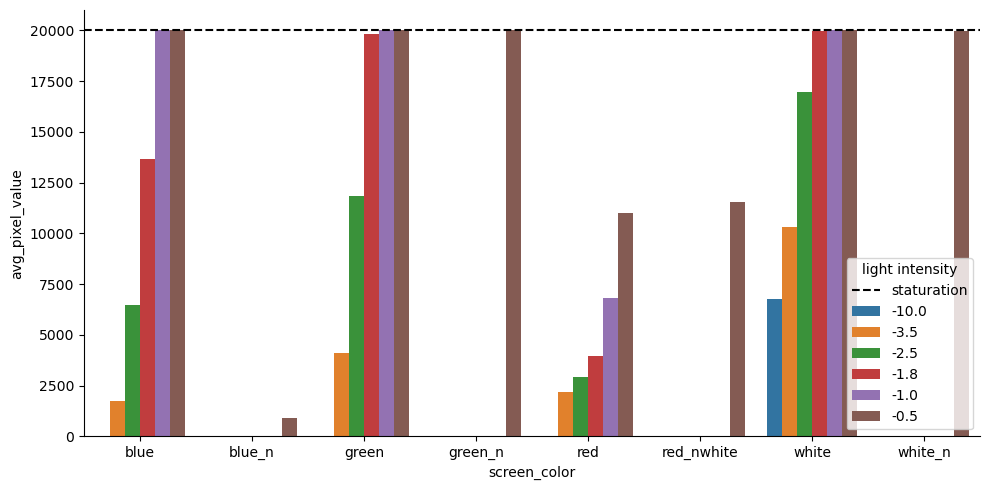

In [42]:

plt.figure(figsize=(15,5))

sns.catplot(data=screen_data,kind='bar',
            x='screen_color',y='avg_pixel_value',hue='intensity',height=5,aspect=2,legend=False)

plt.axhline(y=saturation_level,c='k',linestyle='--',label='staturation')

plt.tight_layout()
plt.legend(loc='lower right',title='light intensity')

